In [1]:
using Pkg; Pkg.activate(".")

  Activating project at `~/Documents/Julia/Julia_ML_training/unit5`


In [2]:
using AlgebraOfGraphics
dat = AlgebraOfGraphics.penguins()
@show typeof(dat)
@show keys(dat)
@show [length(d) for d in dat];

typeof(dat) = @NamedTuple{species::Vector{String}, island::Vector{String}, bill_length_mm::Vector{Float64}, bill_depth_mm::Vector{Float64}, flipper_length_mm::Vector{Int64}, body_mass_g::Vector{Int64}, sex::Vector{String}}
keys(dat) = (:species, :island, :bill_length_mm, :bill_depth_mm, :flipper_length_mm, :body_mass_g, :sex)
[length(d) for d = dat] = [333, 333, 333, 333, 333, 333, 333]


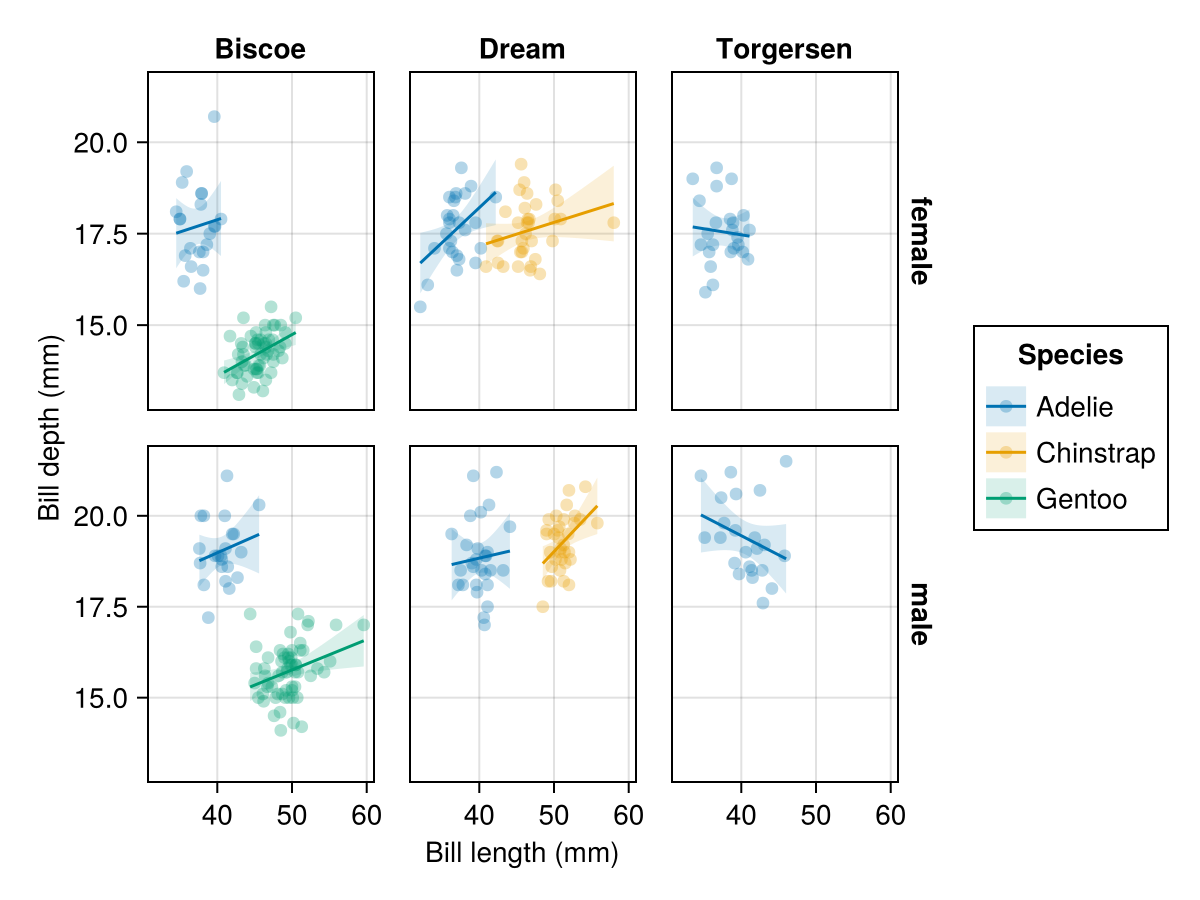

In [5]:
using CairoMakie

spec =
    data(dat) *
    mapping(
        :bill_length_mm => "Bill length (mm)",
        :bill_depth_mm => "Bill depth (mm)",
        color = :species => "Species",
        row = :sex,
        col = :island,
    ) *(visual(Scatter, alpha = 0.3) + linear())

draw(spec)

In [7]:
using CairoMakie

spec =
    data(dat) *
    mapping(
        :bill_length_mm => "Bill length (mm)",
        :bill_depth_mm => "Bill depth (mm)",
        color = :species => "Species",
        row = :sex,
        col = :island,
    ) *(visual(Scatter, alpha = 0.3) + linear())

draw(spec)

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///Users/uqkbairo/Documents/Julia/Julia_ML_training/unit5/In[7]#4:16\[90mIn[7]:4:16[0;0m]8;;\
spec =
    data(dat) ?[48;2;120;70;70m[0;0m*
[90m#              └ ── [0;0m[91mspace required after `?` operator[0;0m

In [11]:
?*(plot object 1, plot object 2)

search:

Couldn't find '*(plot object 1, plot object 2)'
Perhaps you meant Base.active_project


No documentation found.

Binding '`*(plot object 1, plot object 2)`' does not exist.


In [22]:
data(dat) * mapping(
                    :bill_length_mm => "Bill length (mm)",
    :bill_depth_mm => "Bill depth (mm)",
                    color = :species => "Species",
                    row = :sex,
                    col = :island,
                    ) * AlgebraOfGraphics.density() |> draw

LoadError: ArgumentError: ProcessedLayer with plot type Heatmap did not have :color in its AestheticMapping. The mapping was {1 = AlgebraOfGraphics.AesX, 2 = AlgebraOfGraphics.AesY, 3 = AlgebraOfGraphics.AesColor}

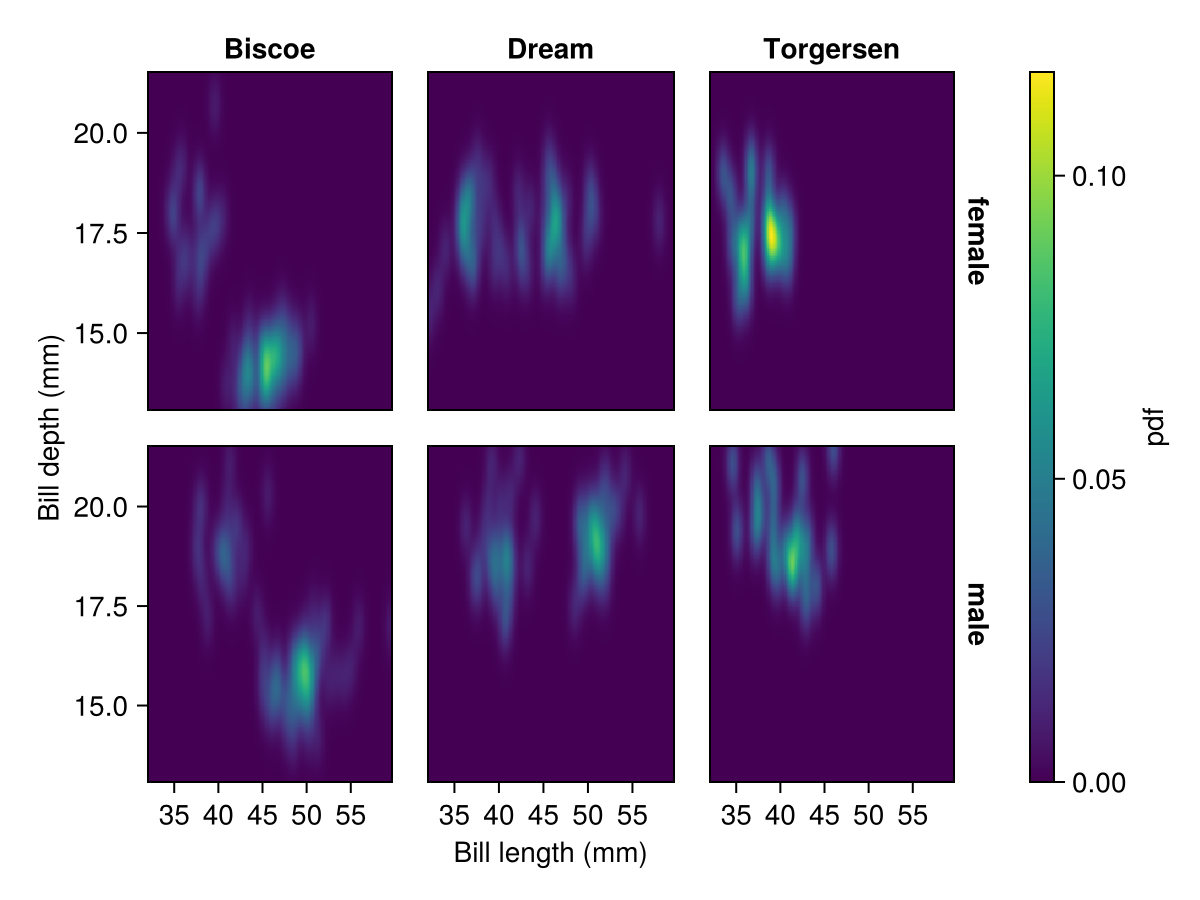

In [29]:
data(dat) * mapping(
                    :bill_length_mm => "Bill length (mm)",
                    :bill_depth_mm => "Bill depth (mm)",
                    row = :sex,
                    col = :island,
                    ) * AlgebraOfGraphics.density(bandwidth=(0.5,0.5)) |> draw

In [25]:
?AlgebraOfGraphics.density(bandwidth=0.2)

```
density(; datalimits=automatic, kernel=automatic, bandwidth=automatic, npoints=200)
```

Fit a kernel density estimation of `data`.

Here, `datalimits` specifies the range for which the density should be calculated (it defaults to the extrema of the whole data). The keyword argument `datalimits` can be a tuple of two values, e.g. `datalimits=(0, 10)`, or a function to be applied group by group, e.g. `datalimits=extrema`. The keyword arguments `kernel` and `bandwidth` are forwarded to `KernelDensity.kde`. `npoints` is the number of points used by Makie to draw the line

Weighted data is supported via the keyword `weights` (passed to `mapping`).


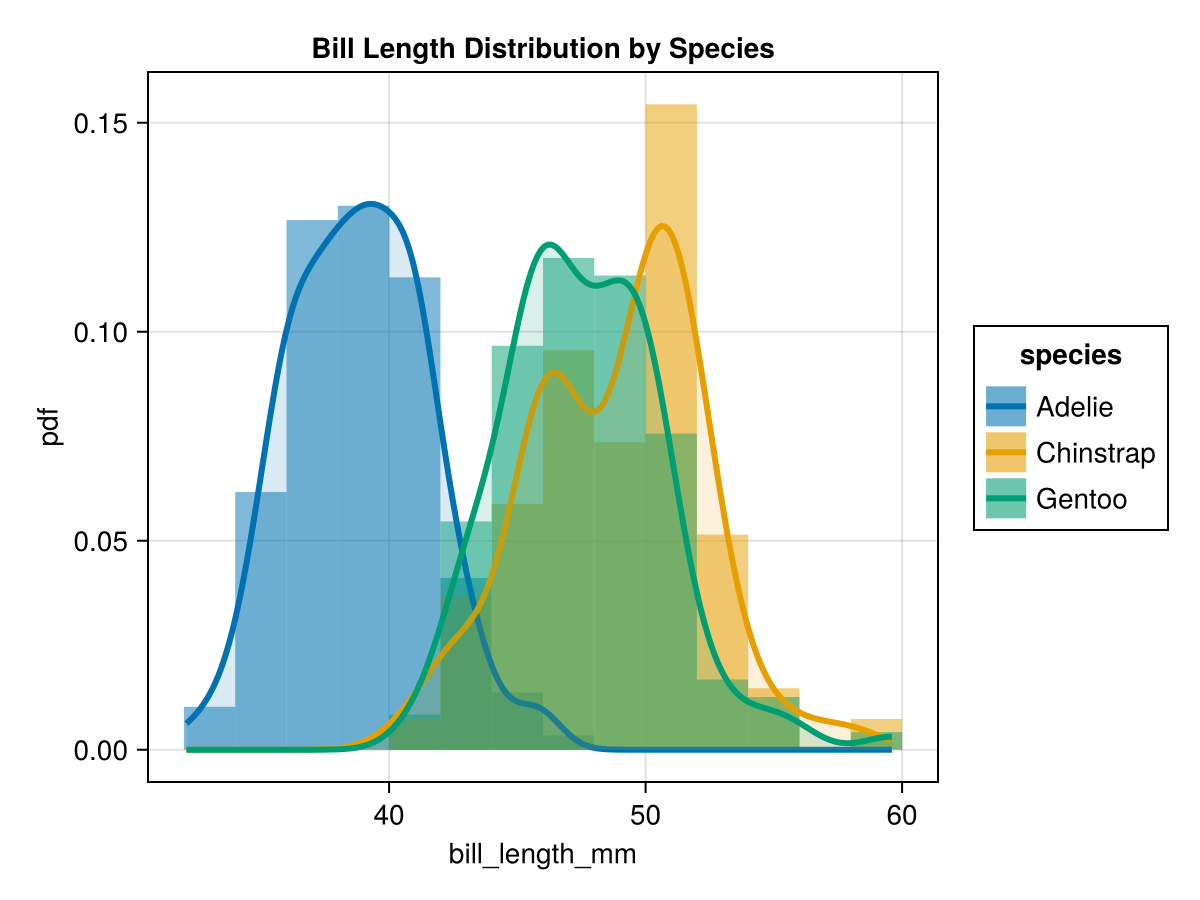

In [30]:
spec = data(dat) *
       mapping(:bill_length_mm, color = :species) *
       (histogram(normalization=:pdf, bins = 20)* visual(alpha=0.5) + AlgebraOfGraphics.density()*visual(linewidth=3))

draw(spec, axis=(; title="Bill Length Distribution by Species"))

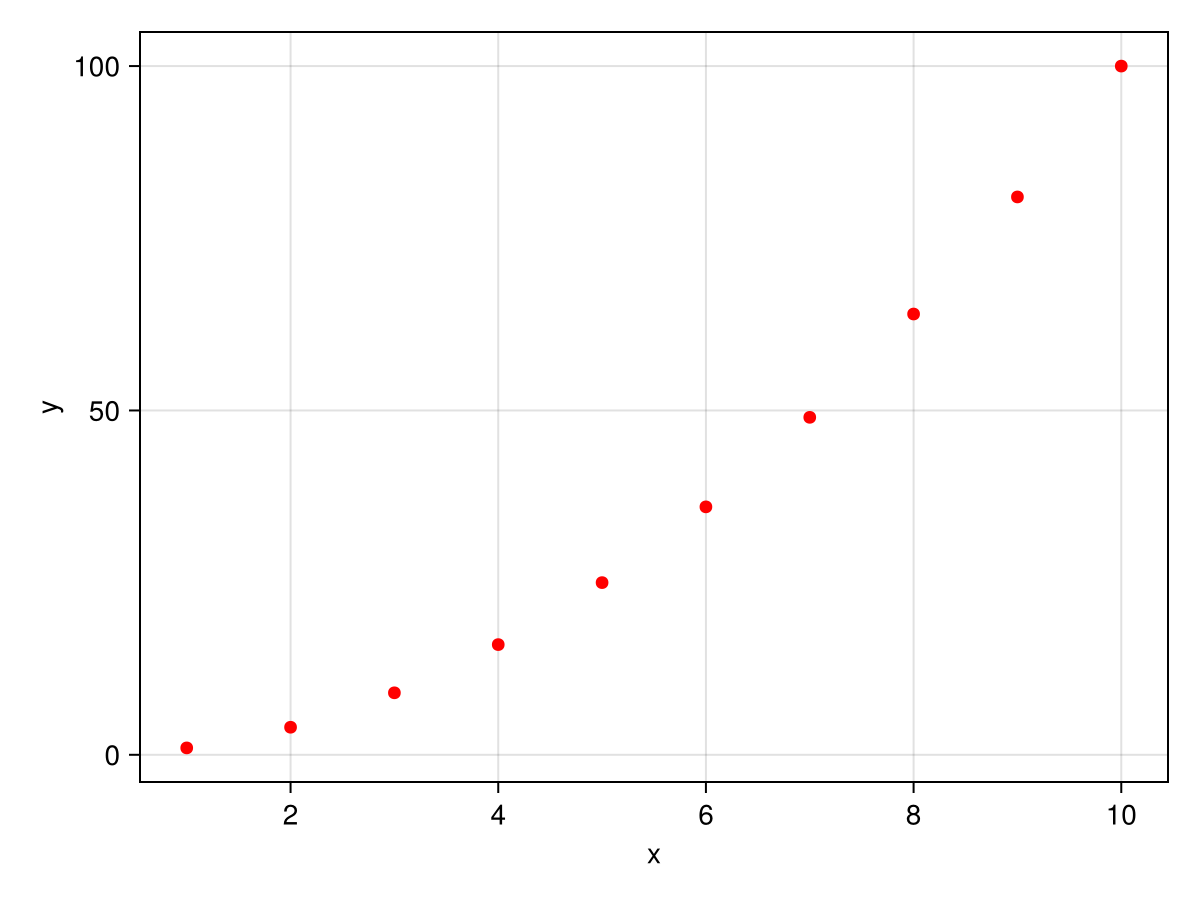

In [53]:
x_points = 1:10;
y_points = x_points.^2;

using DataFrames
dat = DataFrame(x=x_points, y=y_points);

my_plot = data((x=x_points, y=y_points)) *
       mapping(:x, :y) *
        (visual(Scatter, color=:red)) |> draw;
my_plot

In [45]:
?CairoMakie.Scatter

```
scatter(positions)
scatter(x, y)
scatter(x, y, z)
```

Plots a marker for each element in `(x, y, z)`, `(x, y)`, or `positions`.

## Plot type

The plot type alias for the `scatter` function is `Scatter`.

## Attributes

**`alpha`** =  `1.0`  — The alpha value of the colormap or color attribute. Multiple alphas like in `plot(alpha=0.2, color=(:red, 0.5)`, will get multiplied.

**`clip_planes`** =  `automatic`  — Clip planes offer a way to do clipping in 3D space. You can set a Vector of up to 8 `Plane3f` planes here, behind which plots will be clipped (i.e. become invisible). By default clip planes are inherited from the parent plot or scene. You can remove parent `clip_planes` by passing `Plane3f[]`.

**`color`** =  `@inherit markercolor`  — Sets the color of the marker. If no color is set, multiple calls to `scatter!` will cycle through the axis color palette.

**`colormap`** =  `@inherit colormap :viridis`  — Sets the colormap that is sampled for numeric `color`s. `PlotUtils.cgrad(...)`, `Makie.Reverse(any_colormap)` can be used as well, or any symbol from ColorBrewer or PlotUtils. To see all available color gradients, you can call `Makie.available_gradients()`.

**`colorrange`** =  `automatic`  — The values representing the start and end points of `colormap`.

**`colorscale`** =  `identity`  — The color transform function. Can be any function, but only works well together with `Colorbar` for `identity`, `log`, `log2`, `log10`, `sqrt`, `logit`, `Makie.pseudolog10` and `Makie.Symlog10`.

**`cycle`** =  `[:color]`  — Sets which attributes to cycle when creating multiple plots

**`depth_shift`** =  `0.0`  — Adjusts the depth value of a plot after all other transformations, i.e. in clip space, where `-1 <= depth <= 1`. This only applies to GLMakie and WGLMakie and can be used to adjust render order (like a tunable overdraw).

**`depthsorting`** =  `false`  — Enables depth-sorting of markers which can improve border artifacts. Currently supported in GLMakie only.

**`distancefield`** =  `nothing`  — Optional distancefield used for e.g. font and bezier path rendering. Will get set automatically.

**`font`** =  `@inherit markerfont`  — Sets the font used for character markers. Can be a `String` specifying the (partial) name of a font or the file path of a font file

**`fxaa`** =  `false`  — Adjusts whether the plot is rendered with fxaa (anti-aliasing, GLMakie only).

**`glowcolor`** =  `(:black, 0.0)`  — Sets the color of the glow effect around the marker.

**`glowwidth`** =  `0.0`  — Sets the size of a glow effect around the marker.

**`highclip`** =  `automatic`  — The color for any value above the colorrange.

**`inspectable`** =  `@inherit inspectable`  — Sets whether this plot should be seen by `DataInspector`. The default depends on the theme of the parent scene.

**`inspector_clear`** =  `automatic`  — Sets a callback function `(inspector, plot) -> ...` for cleaning up custom indicators in DataInspector.

**`inspector_hover`** =  `automatic`  — Sets a callback function `(inspector, plot, index) -> ...` which replaces the default `show_data` methods.

**`inspector_label`** =  `automatic`  — Sets a callback function `(plot, index, position) -> string` which replaces the default label generated by DataInspector.

**`lowclip`** =  `automatic`  — The color for any value below the colorrange.

**`marker`** =  `@inherit marker`  — Sets the scatter marker.

**`marker_offset`** =  `Vec3f(0)`  — The offset of the marker from the given position in `markerspace` units. An offset of 0 corresponds to a centered marker.

**`markersize`** =  `@inherit markersize`  — Sets the size of the marker by scaling it relative to its base size which can differ for each marker. A `Real` scales x and y dimensions by the same amount. A `Vec` or `Tuple` with two elements scales x and y separately. An array of either scales each marker separately. Humans perceive the area of a marker as its size which grows quadratically with `markersize`, so multiplying `markersize` by 2 results in a marker that is 4 times as large, visually.

**`markerspace`** =  `:pixel`  — Sets the space in which `markersize` is given. See `Makie.spaces()` for possible inputs

**`model`** =  `automatic`  — Sets a model matrix for the plot. This overrides adjustments made with `translate!`, `rotate!` and `scale!`.

**`nan_color`** =  `:transparent`  — The color for NaN values.

**`overdraw`** =  `false`  — Controls if the plot will draw over other plots. This specifically means ignoring depth checks in GL backends

**`rotation`** =  `Billboard()`  — Sets the rotation of the marker. A `Billboard` rotation is always around the depth axis.

**`space`** =  `:data`  — Sets the transformation space for box encompassing the plot. See `Makie.spaces()` for possible inputs.

**`ssao`** =  `false`  — Adjusts whether the plot is rendered with ssao (screen space ambient occlusion). Note that this only makes sense in 3D plots and is only applicable with `fxaa = true`.

**`strokecolor`** =  `@inherit markerstrokecolor`  — Sets the color of the outline around a marker.

**`strokewidth`** =  `@inherit markerstrokewidth`  — Sets the width of the outline around a marker.

**`transform_marker`** =  `false`  — Controls whether the model matrix (without translation) applies to the marker itself, rather than just the positions. (If this is true, `scale!` and `rotate!` will affect the marker.

**`transformation`** =  `:automatic`  — *No docs available.*

**`transparency`** =  `false`  — Adjusts how the plot deals with transparency. In GLMakie `transparency = true` results in using Order Independent Transparency.

**`uv_offset_width`** =  `(0.0, 0.0, 0.0, 0.0)`  — *No docs available.*

**`visible`** =  `true`  — Controls whether the plot will be rendered or not.


In [41]:
?histogram


search: histogram



```
histogram(plottype::Type{<:Plot} = Plot{plot}; bins=automatic, datalimits=automatic, closed=:left, normalization=:none)
```

Compute a histogram.

A plot type can be passed as the first argument controlling the type of plot the histogram is displayed as, e.g. `histogram(Stairs)` creates a stephist. The default plot type for 1-dimensional histograms is `BarPlot`, `Heatmap` for 2d, and `Volume` for 3d histograms.

The attribute `bins` can be an `Integer`, an `AbstractVector` (in particular, a range), or a `Tuple` of either integers or abstract vectors (useful for 2- or 3-dimensional histograms). When `bins` is an `Integer`, it denotes the approximate number of equal-width intervals used to compute the histogram. In that case, the range covered by the intervals is defined by `datalimits` (it defaults to the extrema of the whole data). The keyword argument `datalimits` can be a tuple of two values, e.g. `datalimits=(0, 10)`, or a function to be applied group by group, e.g. `datalimits=extrema`. When `bins` is an `AbstractVector`, it denotes the intervals directly.

`closed` determines whether the the intervals are closed to the left or to the right.

The histogram can be normalized by setting `normalization`. Possible values are:

  * `:pdf`: Normalize by sum of weights and bin sizes. Resulting histogram  has norm 1 and represents a PDF.
  * `:density`: Normalize by bin sizes only. Resulting histogram represents  count density of input and does not have norm 1.
  * `:probability`: Normalize by sum of weights only. Resulting histogram  represents the fraction of probability mass for each bin and does not have  norm 1.
  * `:none`: Do not normalize.

Weighted data is supported via the keyword `weights` (passed to `mapping`).

!!! note
    Normalizations are computed withing groups. For example, in the case of `normalization=:pdf`, sum of weights *within each group* will be equal to `1`.



In [55]:
using ComponentArrays, Lux, DiffEqFlux, OrdinaryDiffEq, Optimization, OptimizationOptimJL,
      OptimizationOptimisers, Random, CairoMakie

115.86056, 

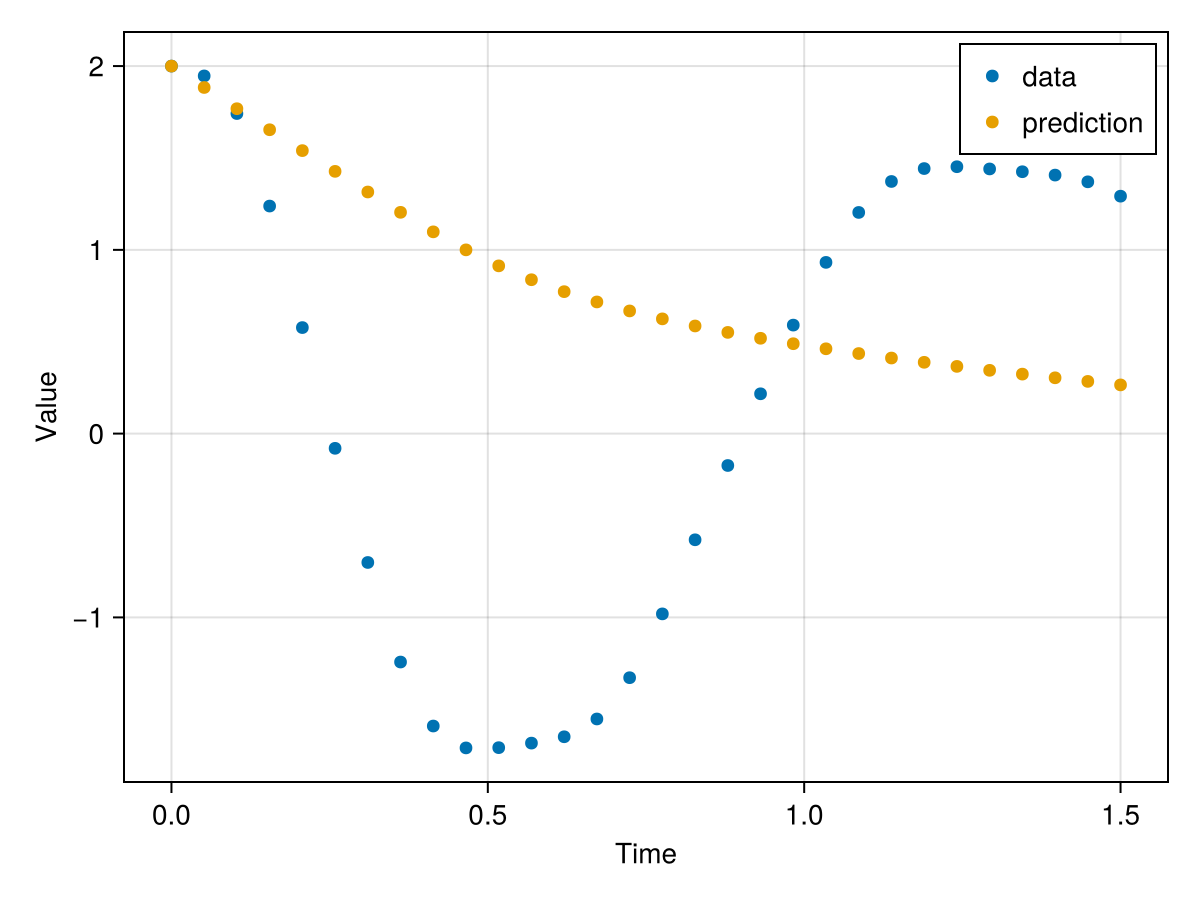

115.86056, 134.13464, 99.27753, 92.6321, 89.322586, 87.03303, 84.99284, 82.56473, 79.733406, 76.604485, 72.4385, 67.24247, 62.428394, 56.62393, 52.97148, 50.600838, 48.60932, 47.048, 45.78298, 44.215744, 42.224125, 39.132477, 37.398586, 35.366432, 30.655146, 27.554094, 24.268702, 28.979944, 26.147177, 23.425106, 23.924658, 20.227932, 16.747297, 19.058552, 13.2913685, 14.725422, 13.258441, 9.647971, 11.070469, 7.901047, 7.1361213, 7.5628667, 5.7859874, 6.504647, 4.8463593, 5.1328177, 5.048829, 4.465682, 5.128138, 4.3972316, 4.664071, 4.5731525, 4.21958, 4.4876304, 4.1461887, 4.154315, 4.09665, 3.7618816, 3.8468351, 3.5452793, 3.466573, 3.3905783, 3.1804366, 3.1984065, 3.0281353, 2.9179697, 2.9012165, 2.7691128, 2.7143717, 2.61932, 2.525072, 2.5038114, 2.3575478, 2.359097, 2.2411578, 2.1826906, 2.1581228, 2.0503383, 2.0350747, 1.9267993, 1.9131451, 1.8386925, 1.823403, 1.7574728, 1.7257615, 1.6585672, 1.6539958, 1.6008627, 1.5696721, 1.5308857, 1.4974895, 1.4638528, 1.4432818, 1.4118583,

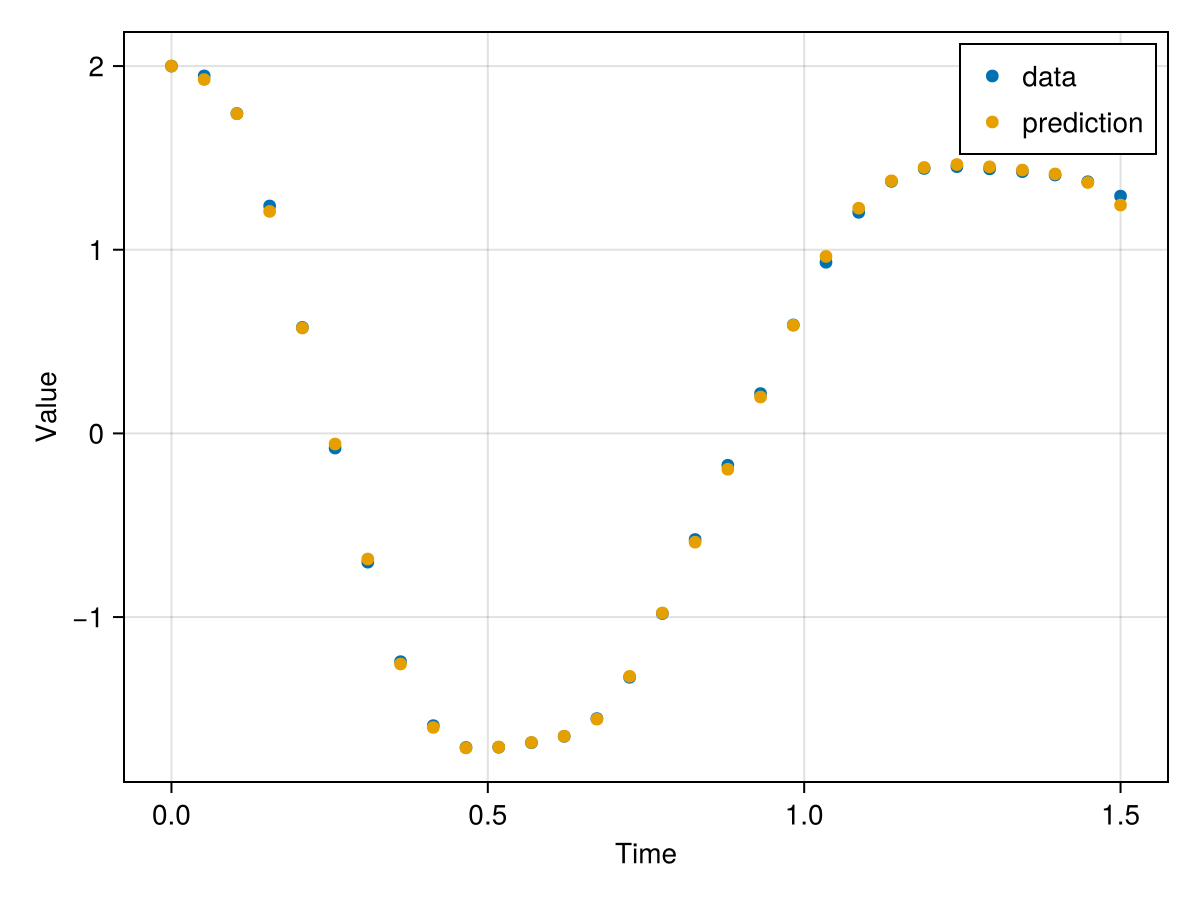

false

In [56]:
using ComponentArrays, Lux, DiffEqFlux, OrdinaryDiffEq, Optimization, OptimizationOptimJL,
      OptimizationOptimisers, Random, CairoMakie

rng = Xoshiro(0)
u0 = Float32[2.0; 0.0]
datasize = 30
tspan = (0.0f0, 1.5f0)
tsteps = range(tspan[1], tspan[2]; length = datasize)

function trueODEfunc(du, u, p, t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u .^ 3)'true_A)'
end

prob_trueode = ODEProblem(trueODEfunc, u0, tspan)
ode_data = Array(solve(prob_trueode, Tsit5(); saveat = tsteps))

dudt2 = Chain(x -> x .^ 3, Dense(2, 50, tanh), Dense(50, 2))
p, st = Lux.setup(rng, dudt2)
prob_neuralode = NeuralODE(dudt2, tspan, Tsit5(); saveat = tsteps)

function predict_neuralode(p)
    Array(prob_neuralode(u0, p, st)[1])
end

function loss_neuralode(p)
    pred = predict_neuralode(p)
    loss = sum(abs2, ode_data .- pred)
    return loss
end

function callback(state, l; doplot = false)
    print(l, ", ")
    if doplot
        pred = predict_neuralode(state.u)
        fig = Figure()
        ax = CairoMakie.Axis(fig[1, 1], xlabel = "Time", ylabel = "Value")
        scatter!(ax, tsteps, ode_data[1, :]; label = "data")
        scatter!(ax, tsteps, pred[1, :]; label = "prediction")
        axislegend(ax)
        display(fig)
    end
    return false
end

pinit = ComponentArray(p)
callback((; u = pinit), loss_neuralode(pinit); doplot = true)

adtype = Optimization.AutoZygote()
optf = Optimization.OptimizationFunction((x, p) -> loss_neuralode(x), adtype)
optprob = Optimization.OptimizationProblem(optf, pinit)

result_neuralode = Optimization.solve(
    optprob, OptimizationOptimisers.Adam(0.05); callback = callback, maxiters = 300)

optprob2 = remake(optprob; u0 = result_neuralode.u)
result_neuralode2 = Optimization.solve(
    optprob2, Optim.BFGS(; initial_stepnorm = 0.01); callback, allow_f_increases = false)

callback((; u = result_neuralode2.u), loss_neuralode(result_neuralode2.u); doplot = true)

In [58]:
Pkg.add("NeuralPDE")

   Resolving package versions...
   Installed FindFirstFunctions ───── v1.4.1
   Installed LogDensityProblemsAD ─── v1.13.1
   Installed AbstractMCMC ─────────── v5.6.3
   Installed SLEEFPirates ─────────── v0.6.43
   Installed Integrals ────────────── v4.6.0
   Installed JuliaFormatter ───────── v2.1.2
   Installed NeuralOperators ──────── v0.5.3
   Installed FastPower ────────────── v1.1.3
   Installed JuliaSyntax ──────────── v0.4.10
   Installed MonteCarloIntegration ── v0.2.0
   Installed HCubature ────────────── v1.7.0
   Installed QuasiMonteCarlo ──────── v0.3.3
   Installed MCMCDiagnosticTools ──── v0.3.14
   Installed Boltz ────────────────── v1.6.0
   Installed LatticeRules ─────────── v0.0.1
   Installed DiffEqCallbacks ──────── v4.8.0
   Installed MCMCChains ───────────── v6.0.7
   Installed Cubature_jll ─────────── v1.0.5+0
   Installed ModelingToolkit ──────── v9.80.6
   Installed SCCNonlinearSolve ────── v1.2.0
   Installed VectorizationBase ────── v0.21.71
   Installed 

In [57]:
using NeuralPDE

linear(u, p, t) = cos(t * 2 * pi)
tspan = (0.0, 1.0)
u0 = 0.0
prob = ODEProblem(linear, u0, tspan)

LoadError: ArgumentError: Package NeuralPDE not found in current path.
- Run `import Pkg; Pkg.add("NeuralPDE")` to install the NeuralPDE package.

In [59]:
using Lux, Random

rng = Random.default_rng()
Random.seed!(rng, 0)
chain = Chain(Dense(1, 5, σ), Dense(5, 1))
ps, st = Lux.setup(rng, chain) |> Lux.f64

((layer_1 = (weight = [-0.04929668828845024; -0.3266667425632477; … ; -1.4946011304855347; -1.0391809940338135;;], bias = [-0.458548903465271, -0.8280583620071411, -0.38509929180145264, 0.32322537899017334, -0.32623517513275146]), layer_2 = (weight = [0.5656673908233643 -0.605137288570404 … 0.3129439055919647 0.22128699719905853], bias = [-0.11007555574178696])), (layer_1 = NamedTuple(), layer_2 = NamedTuple()))

In [ ]:
using OptimizationOptimisers

opt = Adam(0.1)
alg = NNODE(chain, opt, init_params = ps)

In [ ]:
sol = solve(prob, alg, verbose = true, maxiters = 2000, saveat = 0.01)

In [ ]:
using OrdinaryDiffEq, Plots

ground_truth = solve(prob, Tsit5(), saveat = 0.01)

plot(ground_truth, label = "ground truth")
plot!(sol.t, sol.u, label = "pred")